# knn用于回归

In [34]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [35]:
x = np.array([[182],[178],[170],[168],[165],[162],[158],[154],[149],[144]])
y = np.array([[113],[105],[86],[83],[86],[74],[72],[45],[49],[43]])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train.shape

(7, 1)

In [36]:
k_range = range(2,8)
k_error = []
for k in k_range:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)
    scores = model.score(x_test, y_test)
    k_error.append(1-scores)


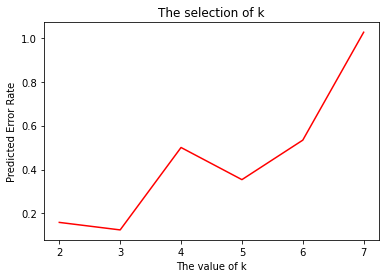

In [37]:
plt.plot(k_range,k_error,'r-')
plt.xlabel('The value of k')
plt.ylabel('Predicted Error Rate')
plt.title('The selection of k')
plt.savefig('imp4-1.png',dpi=300)
plt.show()




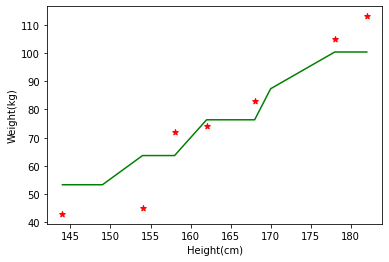

In [38]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(x_train, y_train)

plt.xlabel('Height(cm)')
plt.ylabel('Weight(kg)')

plt.plot(x,model.predict(x),'g-')
plt.scatter(x_train, y_train, c='r', marker='*')
plt.show()

In [39]:
pred = model.predict([[173]])
print('身高173的学生体重预测为:',pred)

身高173的学生体重预测为: [[100.33333333]]
